In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np  
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import brier_score_loss
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

def plot_confusion_matrix(conf_matrix, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.figure(figsize=(8, 6))
    sn.heatmap(conf_matrix, annot=True, fmt='d', cmap=cmap)
    plt.title(title)
    plt.xlabel('Predicted_Status')
    plt.ylabel('Actual_Status')
    plt.xticks(ticks=[0.5, 1.5], labels=classes)
    plt.yticks(ticks=[0.5, 1.5], labels=classes)
    plt.show()

def evaluate_results(Y_validation, predictions):
    pr = precision_score(Y_validation,predictions, average='macro')
    rec = recall_score(Y_validation, predictions, average='macro')
    f1 = f1_score(Y_validation, predictions, average='macro')
    acc = accuracy_score(Y_validation, predictions)
    loss_eval = brier_score_loss(Y_validation,predictions) 
    

    print("Precision:", pr)
    print("Recall:", rec)
    print("F1-score:", f1)
    print("Accuracy:", acc)
    print('Brier score:', loss_eval) 
    print()
    

feature_matrix = pd.read_csv(r"C:\root\code\git\fetal_arrhythmia_detection\feature_matrix.csv")
PCA_train = pd.read_csv(r"C:\root\code\git\fetal_arrhythmia_detection\train_PCA.csv")
PCA_test = pd.read_csv(r"C:\root\code\git\fetal_arrhythmia_detection\test_PCA.csv") 



In [65]:
def feature_classify_PCA(feature_matrix, PCA_train, PCA_test):
    array = feature_matrix.values
    y = array[:, -1]
    Y_train, Y_validation = train_test_split(y, test_size=0.20, random_state=1, stratify=y)
    models = []
    models.append(('LR', LogisticRegression(C = 10, penalty= "l2", solver = 'lbfgs', max_iter = 100)))
    models.append(('LDA', LinearDiscriminantAnalysis(solver ='eigen', shrinkage='auto')))
    models.append(('KNN', KNeighborsClassifier(metric='euclidean')))
    models.append(('CART', DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=4,max_features='sqrt', max_depth=20 )))
    models.append(('NB', GaussianNB(var_smoothing=1e-9)))
    models.append(('SVM', SVC(gamma=0.1, kernel="sigmoid")))
    results = []
    names = []

    if i == 0:
        for name, model in models:
            kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
            cv_results = cross_val_score(model, PCA_train, Y_train, cv=kfold, scoring='accuracy')
            results.append(cv_results)
            names.append(name)
            print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
        print()

    models = [LogisticRegression(C = 10, penalty= "l2", solver = 'lbfgs', max_iter = 100), LinearDiscriminantAnalysis(solver ='eigen', shrinkage='auto'),KNeighborsClassifier(metric='euclidean'),DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=4,max_features='sqrt', max_depth=20 ), GaussianNB(var_smoothing=1e-9), SVC(gamma=0.1, kernel="sigmoid")]
    model = models[i]
    model_names = ["Logistic regression", "Linear Discriminant Analysis", "K Nearest Neighbor", "Decision Trees", "Gaussian Naive Bayes", "Support Vectors"]

    model.fit(PCA_train, Y_train)
    predictions = model.predict(PCA_test)
    
    print("Classification report" + f"(With PCA): {model_names[i]}")
    evaluate_results(Y_validation, predictions)

    return model_names, Y_train, Y_validation, predictions


In [66]:
def feature_classify_data(feature_matrix, i):
    array = feature_matrix.values
    X = array[:,0:15]
    y = array[:,15]
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
        
    models = []
    models.append(('LR', LogisticRegression(solver='newton-cholesky', multi_class='ovr')))
    models.append(('LDA', LinearDiscriminantAnalysis(solver ='lsqr', shrinkage='auto')))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=3, p=2)))
    models.append(('CART', DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=4, max_features= 'log2', max_depth=40)))
    models.append(('NB',  GaussianNB(var_smoothing=.001)))
    models.append(('SVM', SVC(gamma='scale', kernel="rbf")))
    results = []
    names = []
    

    scaler = MinMaxScaler()
    fitted_scale = scaler.fit(X_train)
    X_train = fitted_scale.transform(X_train)
    X_test = fitted_scale.transform(X_test)
    
    if i == 0:
        for name, model in models:
            kfold = StratifiedKFold(n_splits=9, random_state=1, shuffle=True)
            cv_results = cross_val_score(model, PCA_train, Y_train, cv=kfold, scoring='accuracy')
            results.append(cv_results)
            names.append(name)
            print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
        print()

    models = [LogisticRegression(solver='newton-cholesky', multi_class='ovr'), LinearDiscriminantAnalysis(solver ='lsqr', shrinkage='auto'),KNeighborsClassifier(n_neighbors=3, p=2),DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=4, max_features= 'log2', max_depth=40), GaussianNB(var_smoothing=.001), SVC(gamma='scale', kernel="rbf")]
    model_names = ["Logistic regression", "Linear Discriminant Analysis", "K Nearest Neighbor", "Decision Trees", "Gaussian Naive Bayes", "Support Vectors"]
    model = models[i]
    model.fit(X_train, Y_train)
    predictions = model.predict(X_test)    
    
    print("Classification report" + f"(Without PCA): {model_names[i]}")
    evaluate_results(Y_test, predictions)
    
    return model_names, Y_train, Y_test, predictions

LR: 0.450000 (0.100000)
LDA: 0.450000 (0.100000)
KNN: 0.550000 (0.100000)
CART: 0.400000 (0.254951)
NB: 0.550000 (0.187083)
SVM: 0.500000 (0.158114)

Classification report(With PCA): Logistic regression
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666
Accuracy: 0.6666666666666666
Brier score: 0.3333333333333333



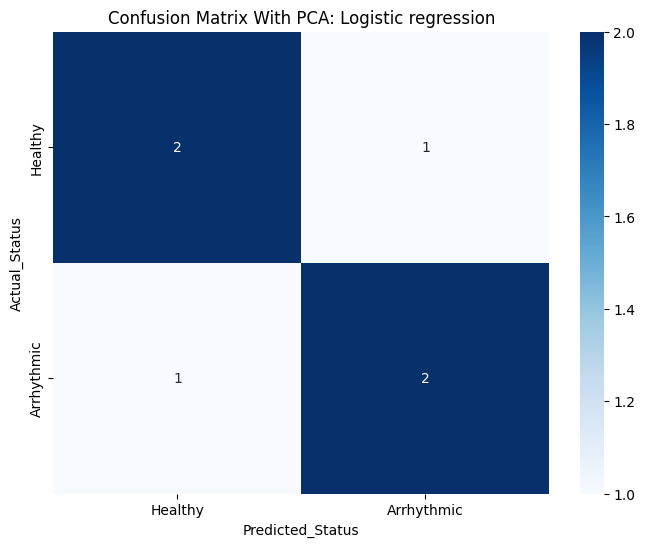

Classification report(With PCA): Linear Discriminant Analysis
Precision: 0.875
Recall: 0.8333333333333333
F1-score: 0.8285714285714285
Accuracy: 0.8333333333333334
Brier score: 0.16666666666666666



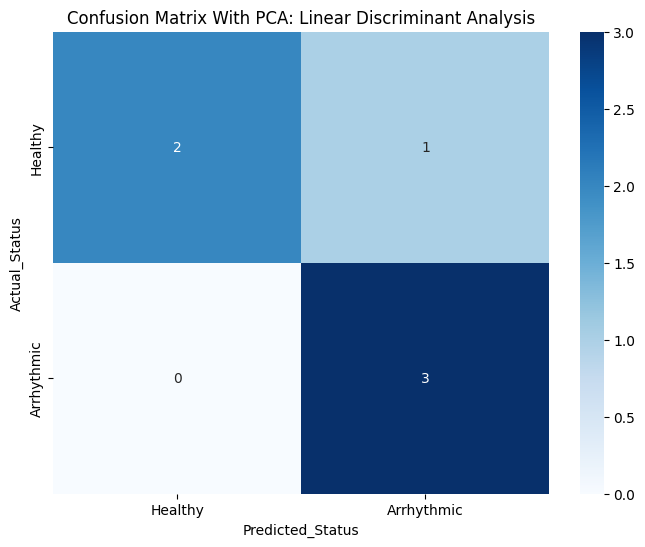

Classification report(With PCA): K Nearest Neighbor
Precision: 0.8
Recall: 0.6666666666666666
F1-score: 0.625
Accuracy: 0.6666666666666666
Brier score: 0.3333333333333333



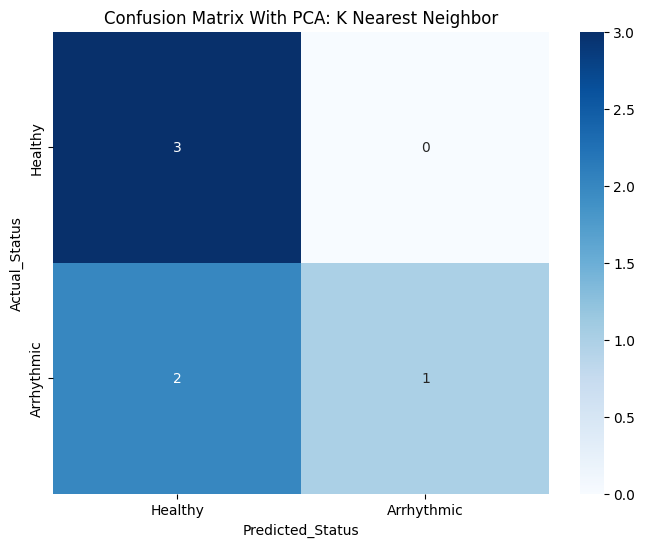

Classification report(With PCA): Decision Trees
Precision: 0.5
Recall: 0.5
F1-score: 0.48571428571428577
Accuracy: 0.5
Brier score: 0.5



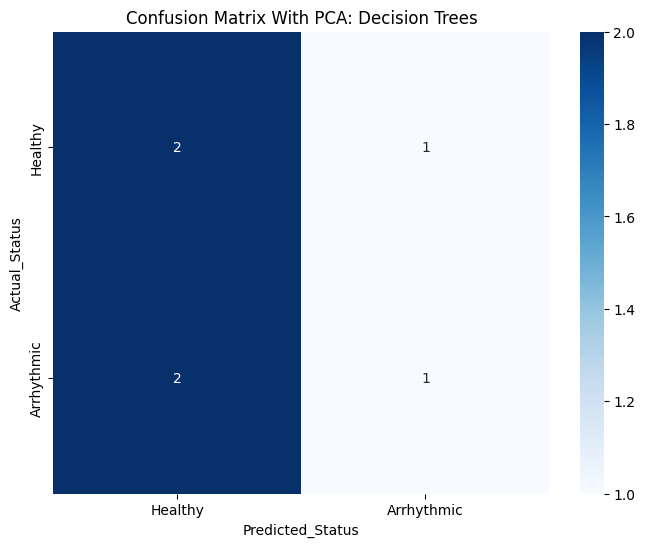

Classification report(With PCA): Gaussian Naive Bayes
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666
Accuracy: 0.6666666666666666
Brier score: 0.3333333333333333



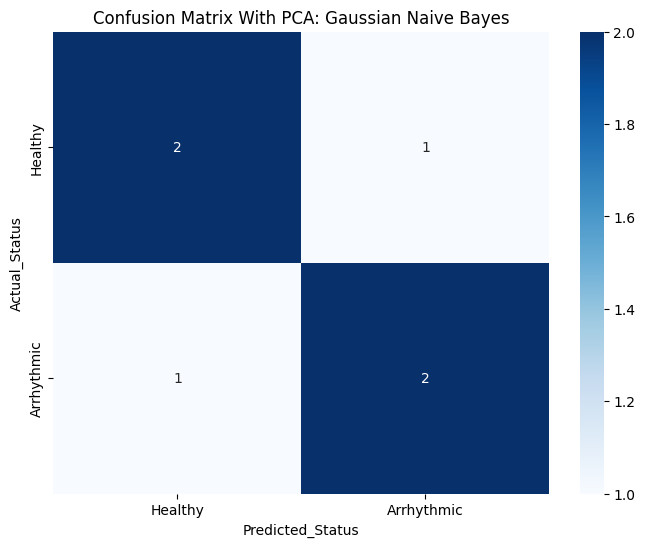

Classification report(With PCA): Support Vectors
Precision: 0.875
Recall: 0.8333333333333333
F1-score: 0.8285714285714285
Accuracy: 0.8333333333333334
Brier score: 0.16666666666666666



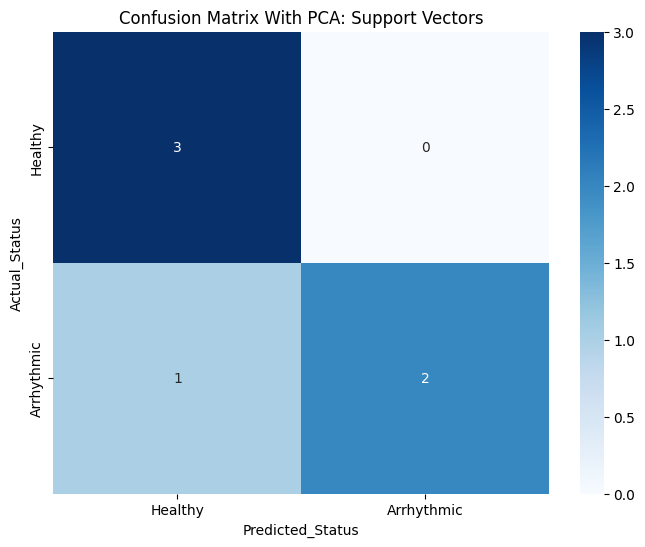

In [67]:
for i in range(0, 6):
    model_names, Y_train, Y_validation, predictions = feature_classify_PCA(feature_matrix=feature_matrix, PCA_train=PCA_train, PCA_test=PCA_test)
    conf_matrix = confusion_matrix(Y_validation,predictions)
    class_labels = ["Healthy", "Arrhythmic"]

    plot_confusion_matrix(conf_matrix, class_labels, title = 'Confusion Matrix With PCA: ' + model_names[i])
    classification_report(Y_validation, predictions)

LR: 0.407407 (0.223760)
LDA: 0.555556 (0.283279)
KNN: 0.351852 (0.199451)
CART: 0.611111 (0.314270)
NB: 0.685185 (0.228312)
SVM: 0.518519 (0.241452)

Classification report(Without PCA): Logistic regression
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666
Accuracy: 0.6666666666666666
Brier score: 0.3333333333333333



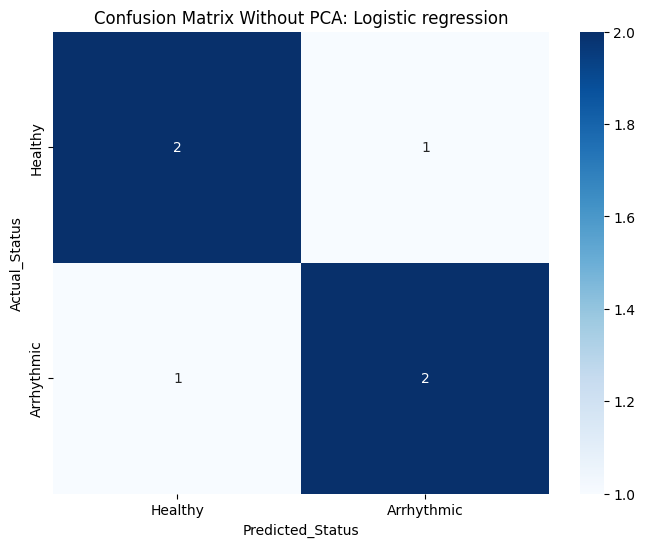

Classification report(Without PCA): Linear Discriminant Analysis
Precision: 0.5
Recall: 0.5
F1-score: 0.48571428571428577
Accuracy: 0.5
Brier score: 0.5



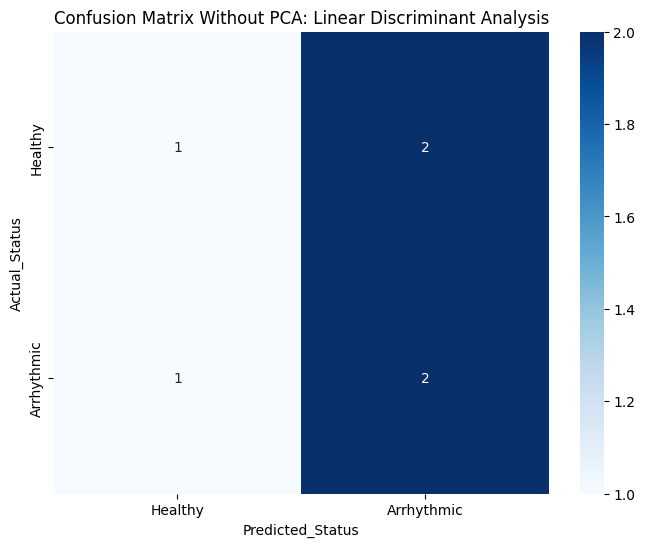

Classification report(Without PCA): K Nearest Neighbor
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666
Accuracy: 0.6666666666666666
Brier score: 0.3333333333333333



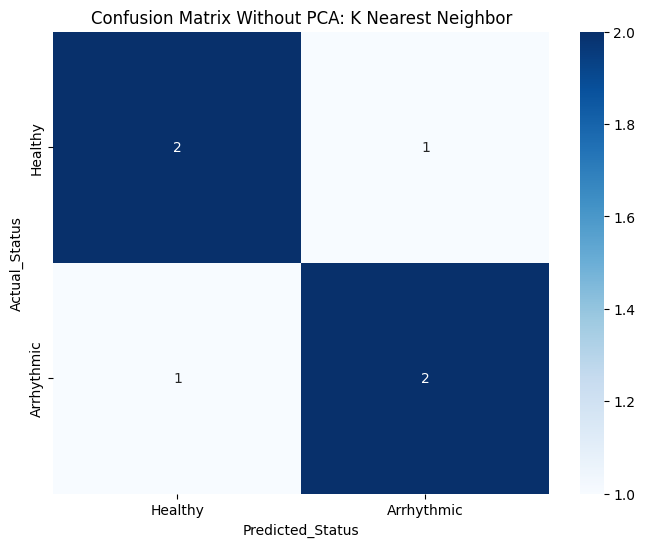

Classification report(Without PCA): Decision Trees
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666
Accuracy: 0.6666666666666666
Brier score: 0.3333333333333333



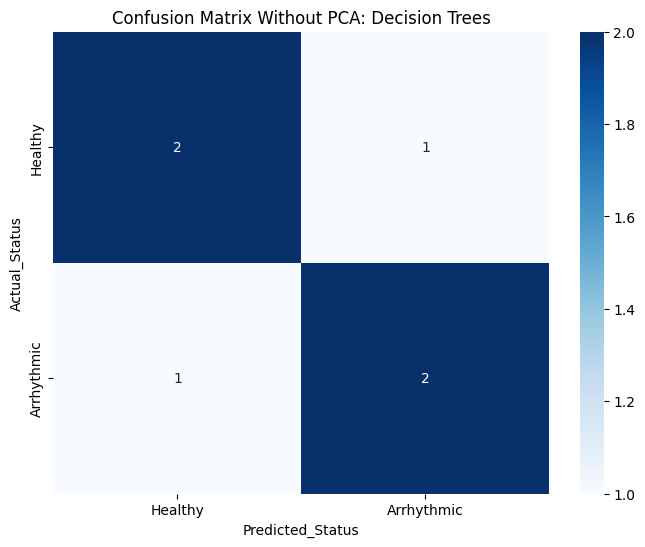

Classification report(Without PCA): Gaussian Naive Bayes
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666
Accuracy: 0.6666666666666666
Brier score: 0.3333333333333333



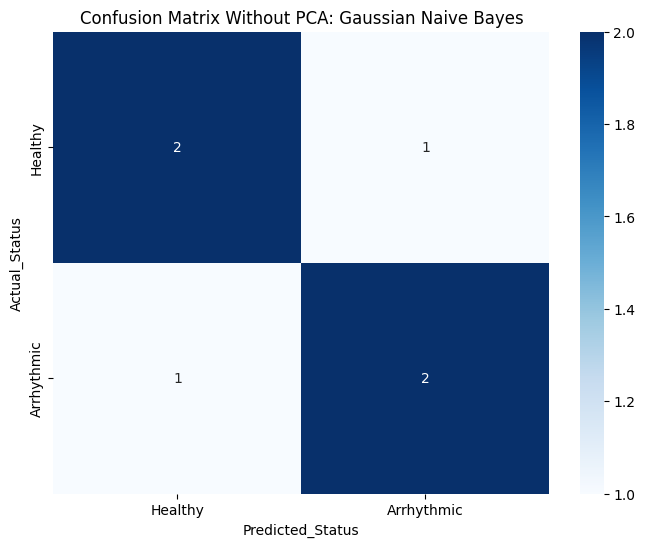

Classification report(Without PCA): Support Vectors
Precision: 0.6666666666666666
Recall: 0.6666666666666666
F1-score: 0.6666666666666666
Accuracy: 0.6666666666666666
Brier score: 0.3333333333333333



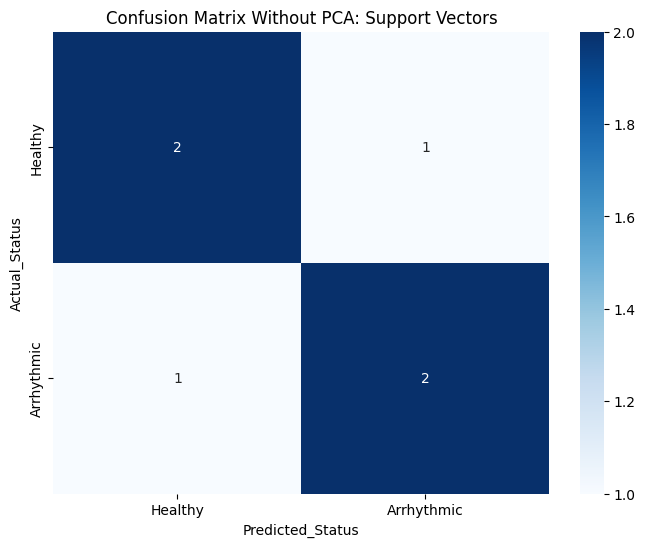

In [68]:
for i in range(0,6):
    model_names, Y_train, Y_validation, predictions = feature_classify_data(feature_matrix, i)
    conf_matrix = confusion_matrix(Y_validation,predictions)
    class_labels = ["Healthy", "Arrhythmic"]
    
    plot_confusion_matrix(conf_matrix, class_labels, title = 'Confusion Matrix Without PCA: ' + model_names[i])
    classification_report(Y_validation, predictions)